In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

os.chdir(r'C:\Users\Imper\OneDrive\Documents\Raul Castillo\College\Year - 2\SMART Program\ComparingModels\HelperFunctions')
import auxiliaries as aux
os.chdir(r'C:\Users\Imper\OneDrive\Documents\Raul Castillo\College\Year - 2\SMART Program\ComparingModels')

C:\Users\Imper\OneDrive\Documents\Raul Castillo\College\Year - 2\SMART Program\ComparingModels\HelperFunctions\auxiliaries.py:16: SyntaxWarning: invalid escape sequence '\{'
  orig_df = pd.read_csv(f'CleanCSV\{cv_name}.csv')


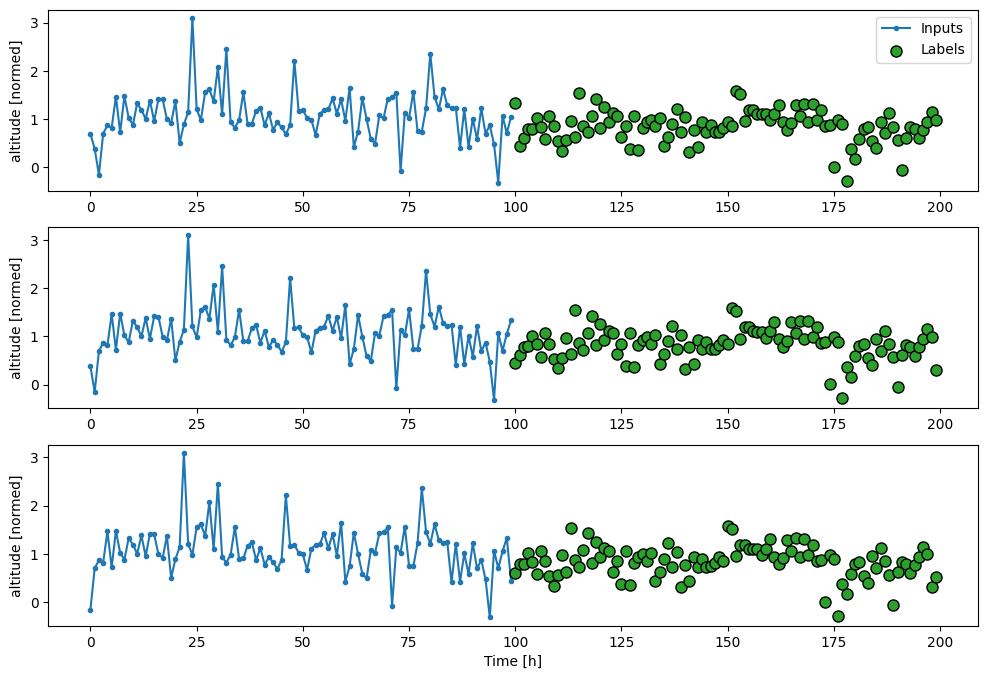

In [2]:
multi_window = aux.WindowGenerator(input_width=100,
                               label_width=aux.OUT_STEPS,
                               shift=aux.OUT_STEPS)
multi_window.plot()

In [3]:
feedback_model = aux.FeedBack(units=32, out_steps=aux.OUT_STEPS)

In [4]:
feedback_model

<FeedBack name=feed_back, built=False>

In [5]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 7])

In [6]:
multi_window.label_width

100

In [7]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 100, 7)


In [8]:
history = aux.compile_and_fit(feedback_model, multi_window)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - loss: 0.9252 - mean_absolute_error: 0.6570 - val_loss: 1.5604 - val_mean_absolute_error: 0.9166
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 1.0510 - mean_absolute_error: 0.7430 - val_loss: 1.0463 - val_mean_absolute_error: 0.7500
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.9451 - mean_absolute_error: 0.6814 - val_loss: 1.0966 - val_mean_absolute_error: 0.7619
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.9982 - mean_absolute_error: 0.6997 - val_loss: 1.0176 - val_mean_absolute_error: 0.7405
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.8486 - mean_absolute_error: 0.6190 - val_loss: 1.0311 - val_mean_absolute_error: 0.7384
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.8294 - mean_absolute_error: 0.6064 - val_loss: 0.8051 - val_mean_absolute_error: 0.6177
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.7866 - mean_absolute_error: 0.

In [9]:
x, y = (next(iter(multi_window.test)))

In [10]:
x

<tf.Tensor: shape=(32, 100, 7), dtype=float32, numpy=
array([[[-0.02770504, -0.11208483,  0.4635495 , ...,  0.09874526,
          0.54524887,  0.5495695 ],
        [-0.09155305, -0.15088572,  0.5410164 , ...,  0.09874526,
          0.5805329 ,  0.5495695 ],
        [-0.04910985, -0.16985981,  1.3156852 , ...,  0.09874526,
          0.608165  ,  0.5495695 ],
        ...,
        [-0.79074633,  0.28303427,  0.30861574, ...,  0.09874526,
          1.4456302 ,  0.5495695 ],
        [-0.79334116,  0.2812872 ,  1.0058177 , ...,  0.09874526,
          1.6109977 ,  0.5495695 ],
        [-0.8017518 ,  0.28192833,  1.3931521 , ...,  0.09874526,
          1.2976922 ,  1.7959393 ]],

       [[-0.09155305, -0.15088572,  0.5410164 , ...,  0.09874526,
          0.5805329 ,  0.5495695 ],
        [-0.04910985, -0.16985981,  1.3156852 , ...,  0.09874526,
          0.608165  ,  0.5495695 ],
        [-0.04419671, -0.17198195,  1.5480858 , ...,  0.09874526,
          0.6068897 ,  1.7959393 ],
        ...,


In [11]:
y

<tf.Tensor: shape=(32, 100, 7), dtype=float32, numpy=
array([[[-0.81841   ,  0.28224245,  1.6255527 , ...,  0.09874526,
          1.3691106 ,  1.7959393 ],
        [-0.8265442 ,  0.2826047 ,  1.6255527 , ...,  0.09874526,
          1.7385305 ,  1.7959393 ],
        [-0.8471962 ,  0.28343496,  1.0832845 , ...,  0.09874526,
          1.5595595 ,  0.5495695 ],
        ...,
        [-0.5607097 ,  0.18247697,  1.2382183 , ...,  0.09874526,
          0.20133549,  1.7959393 ],
        [-0.5253382 ,  0.15573564,  0.8508839 , ...,  0.09874526,
          0.6094403 ,  0.5495695 ],
        [-0.5205882 ,  0.15878099,  0.69595015, ...,  0.09874526,
          0.8772592 ,  0.5495695 ]],

       [[-0.8265442 ,  0.2826047 ,  1.6255527 , ...,  0.09874526,
          1.7385305 ,  1.7959393 ],
        [-0.8471962 ,  0.28343496,  1.0832845 , ...,  0.09874526,
          1.5595595 ,  0.5495695 ],
        [-0.8284895 ,  0.29877388,  1.0058177 , ...,  0.09874526,
          0.66470456,  0.5495695 ],
        ...,
